<a href="https://colab.research.google.com/github/Sapna0304/Fraud_Detection-preprocessing-/blob/Sapna0304/Fraud_Transaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### BUSINESS PROBLEM

A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction due to its extremely low processing fees for handling online vendors’ digital payments. This strategy has led to very low costs of acquiring new vendors. Due to this,the company was not able to build a fast and robust fraud detection system. The company’s data engineers curated a dataset that they believe follows the real world distribution of transactions on their payment gateway. The company hired Insofe and provided it with the dataset, to create a fast and robust AI based model that can detect and prevent fraudulent transactions on its payment gateway.

In [34]:
import pandas as pd                 # Pandas for Data Manipulation
import numpy as np                  # Numpy For Mathematical Operations
import matplotlib.pyplot as plt     # Matplotlib for Data Visualization
import seaborn as sns               # Seaborn for Data visualization
import plotly.express as px         # Plotly for visualization
import warnings                     # Warnings to ignore warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report

In [35]:
train = pd.read_csv('/content/MiTh_train.csv')
test = pd.read_csv('/content/Mith_test.csv')

In [36]:
train

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0


In [37]:
test

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2
...,...,...,...,...,...,...,...,...,...,...
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-01 13:02:16+00:00,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2016-12-26 19:41:23+00:00,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-24 04:29:06+00:00,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,2016-12-04 15:38:47+00:00,4


In [38]:
train.shape

(76529, 11)

In [39]:
test.shape

(19133, 10)

In [40]:
train.keys()

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [41]:
print(train.country)

0        IND_INR
1        IND_INR
2        IND_INR
3        IND_INR
4        IND_INR
          ...   
76524    IND_INR
76525    IND_INR
76526    IND_INR
76527    IND_INR
76528    IND_INR
Name: country, Length: 76529, dtype: object


Checking Null Values

In [42]:
train.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [43]:
train.duplicated().sum()

0

In [44]:
test.duplicated().sum()

0

In [45]:
test.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

We can see that both train and test datasets have no null values

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19133 entries, 0 to 19132
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        19133 non-null  int64  
 1   user_id                   19133 non-null  int64  
 2   payment_method            19133 non-null  object 
 3   partner_id                19133 non-null  int64  
 4   partner_category          19133 non-null  object 
 5   country                   19133 non-null  object 
 6   device_type               19133 non-null  object 
 7   money_transacted          19133 non-null  float64
 8   transaction_initiation    19133 non-null  object 
 9   partner_pricing_category  19133 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 1.5+ MB


In [48]:
train.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [49]:
test.nunique()

transaction_number          19133
user_id                      2617
payment_method                  6
partner_id                     20
partner_category                8
country                         1
device_type                     4
money_transacted              695
transaction_initiation      19090
partner_pricing_category        4
dtype: int64

In [50]:
train.value_counts(['is_fraud'], normalize=True)

is_fraud
0           0.997988
1           0.002012
dtype: float64

Data is highly imbalanced majority of data belongs to class 0. Imbalanced ratio is 99:1 .




### Dropping Cols

In [51]:
train.drop(['transaction_number','country'], axis = 1, inplace = True)

In [52]:

test.drop(['transaction_number','country'], axis = 1, inplace = True)

In [53]:
train.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'transaction_initiation',
       'partner_pricing_category', 'is_fraud'],
      dtype='object')

## Conversion into categorical

In [54]:
train_cat= ['payment_method','partner_category', 'device_type','transaction_initiation']
train[train_cat]=train[train_cat].astype('category')

In [55]:
train_num = ['user_id','partner_id','money_transacted','partner_pricing_category']

In [56]:
test_cat =['payment_method','partner_category', 'device_type','transaction_initiation']
test[test_cat]=test[test_cat].astype('category')

In [57]:
test_num = ['user_id','partner_id','money_transacted','partner_pricing_category']

In [58]:
train.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation      category
partner_pricing_category       int64
is_fraud                       int64
dtype: object

In [59]:
test.dtypes

user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
device_type                 category
money_transacted             float64
transaction_initiation      category
partner_pricing_category       int64
dtype: object

Outlier Detection

In [60]:
train[train_num].describe()
Q1=train[train_num].quantile(0.25)
Q3=train[train_num].quantile(0.75)
IQR=Q3-Q1
IQR
((train[train_num]<(Q1-1.5*IQR)) | (train[train_num]>(Q3+1.5*IQR))).any()

user_id                     True
partner_id                  True
money_transacted            True
partner_pricing_category    True
dtype: bool

## EDA

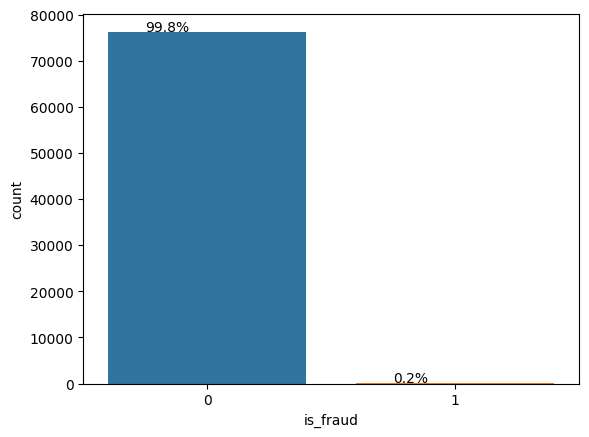

In [61]:
# Create count plot
ax = sns.countplot(x="is_fraud", data=train)

# Add percentage labels
total = len(train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + 0.15
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

# Show plot
plt.show()

We can see there is high imbalance in data, i.e, 99.8% as not fraud and 0.2% is fraud

<Axes: >

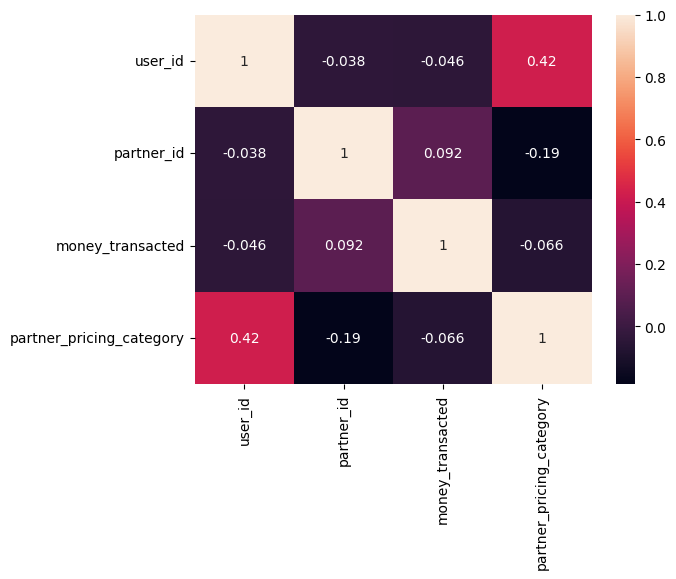

In [62]:
sns.heatmap(train[train_num].corr(),annot=True)

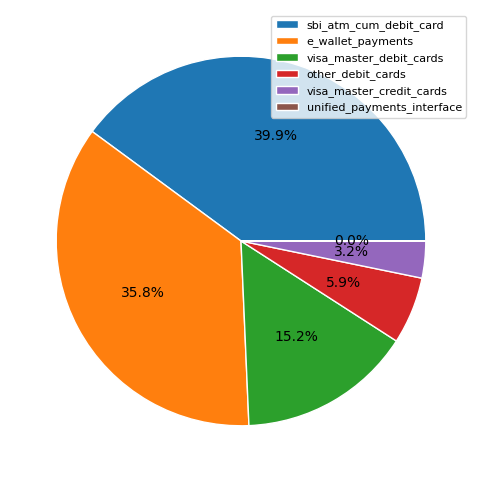

In [63]:
# Count the occurrences of each categorical variable for train data
counts = train['payment_method'].value_counts()

# Get the labels and values
labels = counts.index.tolist()
values = counts.tolist()
plt.figure(figsize=(6,6))

plt.pie(values, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        autopct='%1.1f%%',)
plt.legend(labels, loc='best', fontsize=8)

plt.show()






*   As we can see that transaction through sbi_atm_cum_debit_card and e_wallet_payments are preferred most
*  unified_payments_interace is not used at all.



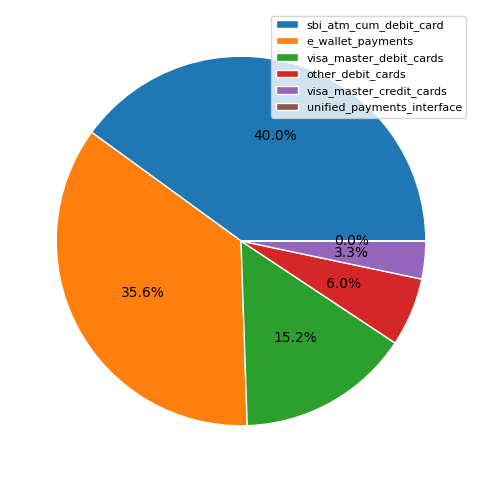

In [64]:
# Count the occurrences of each categorical variable for test data
counts = test['payment_method'].value_counts()

# Get the labels and values
labels = counts.index.tolist()
values = counts.tolist()
plt.figure(figsize=(6,6))

plt.pie(values, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        autopct='%1.1f%%',)
plt.legend(labels, loc='best', fontsize=8)

plt.show()



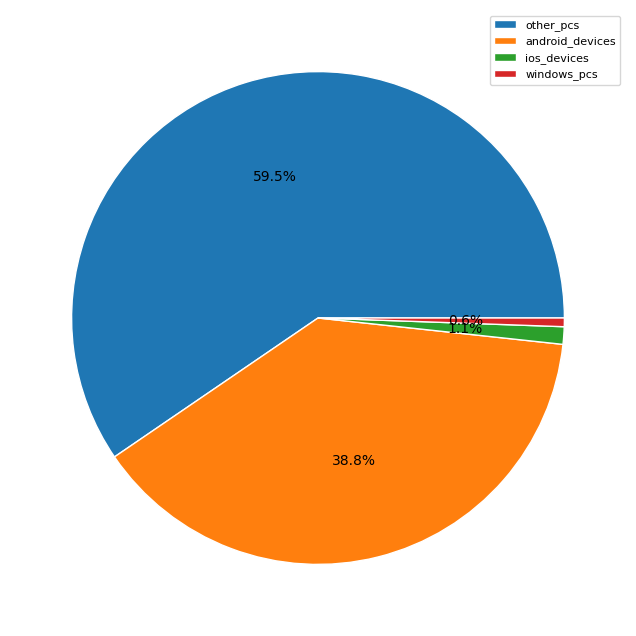

In [65]:
# Count the occurrences of each categorical variable
counts = train['device_type'].value_counts()

# Get the labels and values
labels = counts.index.tolist()
values = counts.tolist()
plt.figure(figsize=(8,8))

plt.pie(values, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        autopct='%1.1f%%',)
plt.legend(labels, loc='best', fontsize=8)

plt.show()



* The most device types used here is android_devices  i.e., 59.5%

* Windows pcs are least used - 0.6%

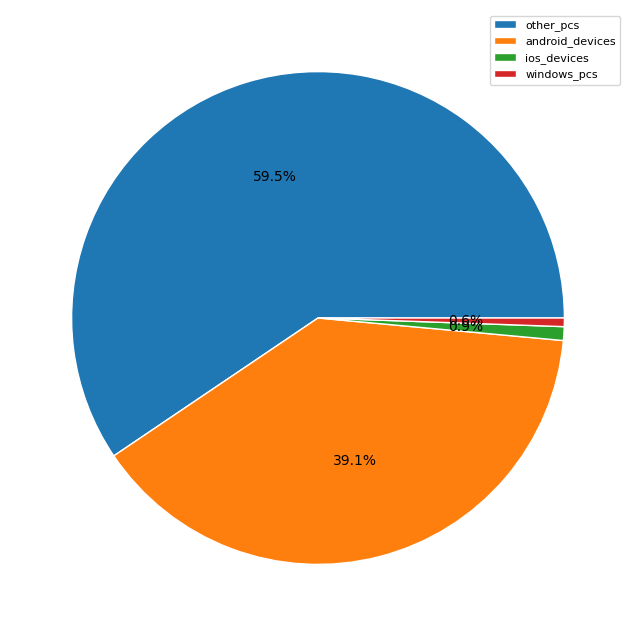

In [66]:
# Count the occurrences of each categorical variable
counts = test['device_type'].value_counts()

# Get the labels and values
labels = counts.index.tolist()
values = counts.tolist()
plt.figure(figsize=(8,8))

plt.pie(values, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, 
        autopct='%1.1f%%',)
plt.legend(labels, loc='best', fontsize=8)

plt.show()

## Feature Engineering for date and time

In [67]:
train['transaction_initiation'] = pd.to_datetime(train['transaction_initiation'])
test['transaction_initiation'] = pd.to_datetime(test['transaction_initiation'])

In [68]:
#for train data
train['year'] = train['transaction_initiation'].dt.year           #extracting year
train['month'] = train['transaction_initiation'].dt.month         #extracting month
train['day'] = train['transaction_initiation'].dt.day              #extracting day
train['time'] = train['transaction_initiation'].dt.time             #extracting time
train.drop(columns='transaction_initiation', axis='column', inplace=True)

In [69]:
#for test data
test['year'] = test['transaction_initiation'].dt.year
test['month'] = test['transaction_initiation'].dt.month
test['day'] = test['transaction_initiation'].dt.day
test['time'] = test['transaction_initiation'].dt.time
test.drop(columns='transaction_initiation', axis='column', inplace=True)

In [70]:
train.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'partner_pricing_category',
       'is_fraud', 'year', 'month', 'day', 'time'],
      dtype='object')

In [71]:
test.columns

Index(['user_id', 'payment_method', 'partner_id', 'partner_category',
       'device_type', 'money_transacted', 'partner_pricing_category', 'year',
       'month', 'day', 'time'],
      dtype='object')



*   We extracted year, month , date, time from transaction_inititation and we also dropped it.
*   I'm also dropping one column from the new extracted feature to avoid redundancy



In [72]:
train.drop(columns='time', axis='column', inplace=True)

In [73]:
test.drop(columns='time', axis='column', inplace=True)

In [74]:
from sklearn.feature_selection import chi2


<Axes: xlabel='month', ylabel='money_transacted'>

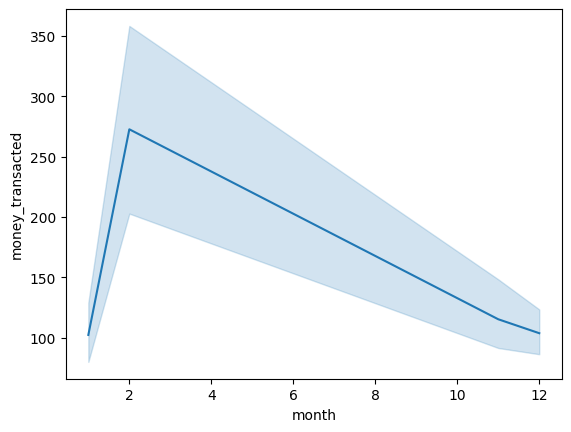

In [75]:
sns.lineplot(x='month', y='money_transacted', data=train)

Text(0.5, 1.0, 'Money Transacted by Month')

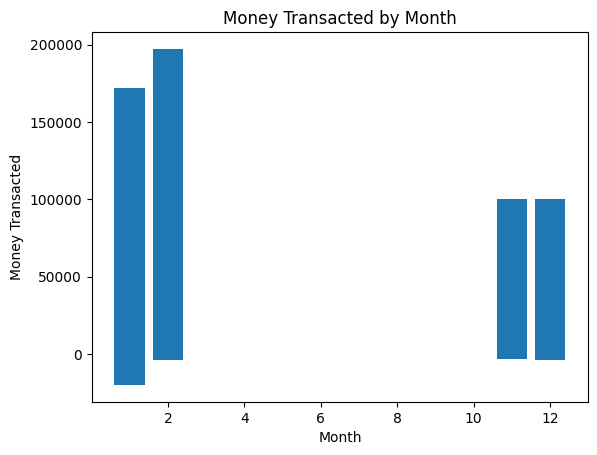

In [78]:
fig, ax = plt.subplots()
ax.bar(train['month'], train['money_transacted'])
ax.set_xlabel('Month')
ax.set_ylabel('Money Transacted')
ax.set_title('Money Transacted by Month')

Text(0.5, 1.0, 'Money Transacted by Month')

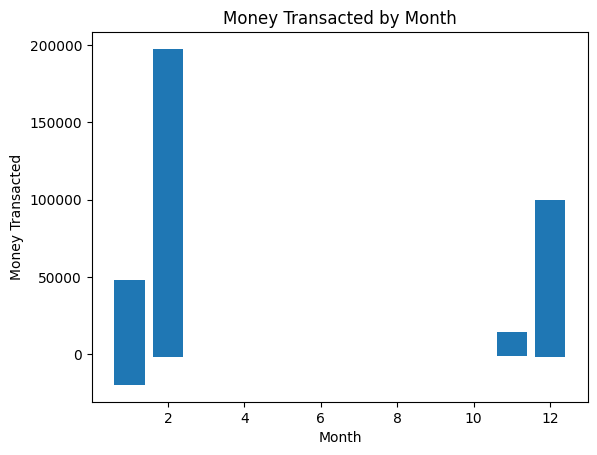

In [79]:
fig, ax = plt.subplots()
ax.bar(test['month'], test['money_transacted'])
ax.set_xlabel('Month')
ax.set_ylabel('Money Transacted')
ax.set_title('Money Transacted by Month')



*   Most transaction were made in the month of February for  both train data & test data




# Chi Square

In [80]:
import pandas as pd
from scipy.stats import chi2_contingency

In [81]:
contingency_table = pd.crosstab(train['payment_method'], train['is_fraud'])


In [82]:
chi2, p, dof, expected = chi2_contingency(contingency_table)


In [83]:
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 732.2125
p-value: 0.0000
Degrees of freedom: 5
Expected frequencies:
[[2.73288949e+04 5.51050713e+01]
 [4.48595467e+03 9.04532922e+00]
 [3.04765481e+04 6.14518941e+01]
 [1.49698154e+01 3.01846359e-02]
 [2.44906179e+03 4.93820643e+00]
 [1.16195707e+04 2.34293144e+01]]


 If the p-value is less than the significance level (usually 0.05), then we can reject the null hypothesis and conclude that there is a significant association between the two variables.

### Encoding

In [84]:
train_data_encoded = pd.get_dummies(train, columns=['partner_category','payment_method','device_type'])


In [85]:
test_data_encoded = pd.get_dummies(test, columns=['partner_category','payment_method','device_type'])


####Splitting the data

In [86]:
from sklearn.model_selection import train_test_split
y=train_data_encoded['is_fraud']
X=train_data_encoded.drop(['is_fraud'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61223, 26)
(15306, 26)
(61223,)
(15306,)


In [87]:
train_data_encoded 

,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud,year,month,day,partner_category_cat_1,partner_category_cat_2,...,payment_method_e_wallet_payments,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,device_type_android_devices,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,17539344,47334,-5.0,2,0,2016,11,15,1,0,...,0,0,1,0,0,0,1,0,0,0
1,24710841,78890,100.0,2,0,2017,1,11,0,1,...,1,0,0,0,0,0,0,0,1,0
2,24265476,78890,50.0,2,0,2016,12,7,0,1,...,1,0,0,0,0,0,0,0,1,0
3,10240000,102557,1000.0,2,0,2017,1,11,0,0,...,0,1,0,0,0,0,0,0,1,0
4,5880625,118335,200.0,2,0,2016,11,16,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,19686969,47334,-100.0,2,0,2016,11,30,1,0,...,0,0,1,0,0,0,1,0,0,0
76525,11662225,118335,200.0,2,0,2017,1,8,1,0,...,0,0,0,0,0,1,0,0,1,0
76526,374544,47334,-3.5,2,0,2016,12,26,1,0,...,0,0,1,0,0,0,1,0,0,0
76527,1687401,47334,-20.0,2,0,2016,12,11,1,0,...,0,0,1,0,0,0,1,0,0,0


In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve , auc , f1_score


In [90]:

RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
y_trains=RF.predict(X_train) 


print(accuracy_score(y_train, y_trains)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

99.99509988076376
99.92159937279497
[[15266     3]
 [    9    28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15269
           1       0.90      0.76      0.82        37

    accuracy                           1.00     15306
   macro avg       0.95      0.88      0.91     15306
weighted avg       1.00      1.00      1.00     15306

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61106
           1       0.98      0.99      0.99       117

    accuracy                           1.00     61223
   macro avg       0.99      1.00      0.99     61223
weighted avg       1.00      1.00      1.00     61223



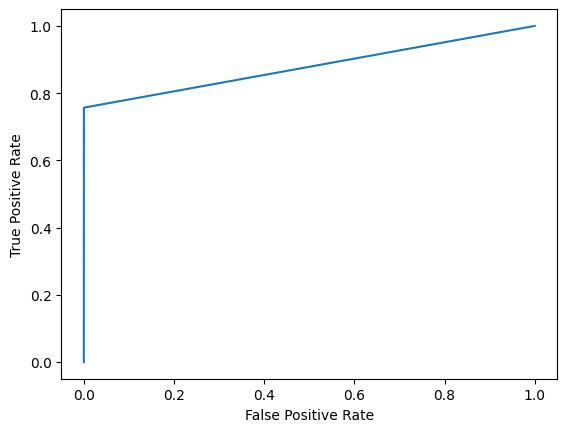

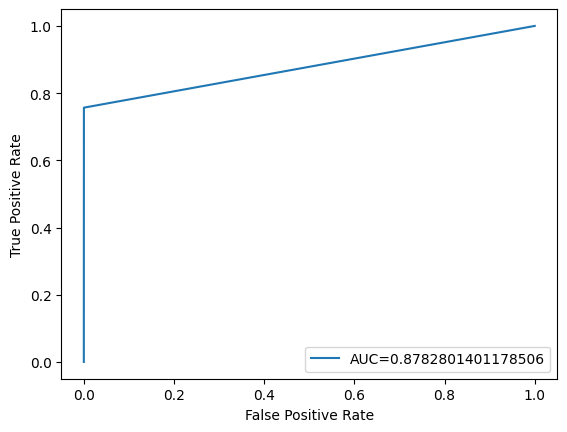

In [91]:

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
auc = metrics.roc_auc_score(y_test, y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()